# Part 1

# Academic Integrity Statement

*I (We) certify that the code and data in this assignment were generated independently,
using only the tools and resources defined in the course and that I (we) did not receive
any external help, coaching or contributions during the production of this work.*

<b> Adding relevant libraries </b>

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryCrossentropy
import numpy as np
import pandas as pd
from livelossplot import PlotLossesKeras
import matplotlib.pyplot as plt
import seaborn as sns

<b> Loading the dataset </b>

In [3]:
data = pd.read_csv('income_dataset.csv')
df = pd.DataFrame(data)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32560 non-null float64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 3.2+ MB


<b> Statistics about the dataset </b>

In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256000e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897801e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055511e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178242e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isna().sum()

age               0
workclass         0
fnlwgt            1
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
df.isin(["?"]).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [9]:
df.drop('fnlwgt',axis=1,inplace=True)
df = df.replace(["?"],np.NAN)
df.isin(["?"]).sum()


#df.drop('?',axis=1,inplace=True)
#df.head()

age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

<b> Plot 1</b>

<function matplotlib.pyplot.show(*args, **kw)>

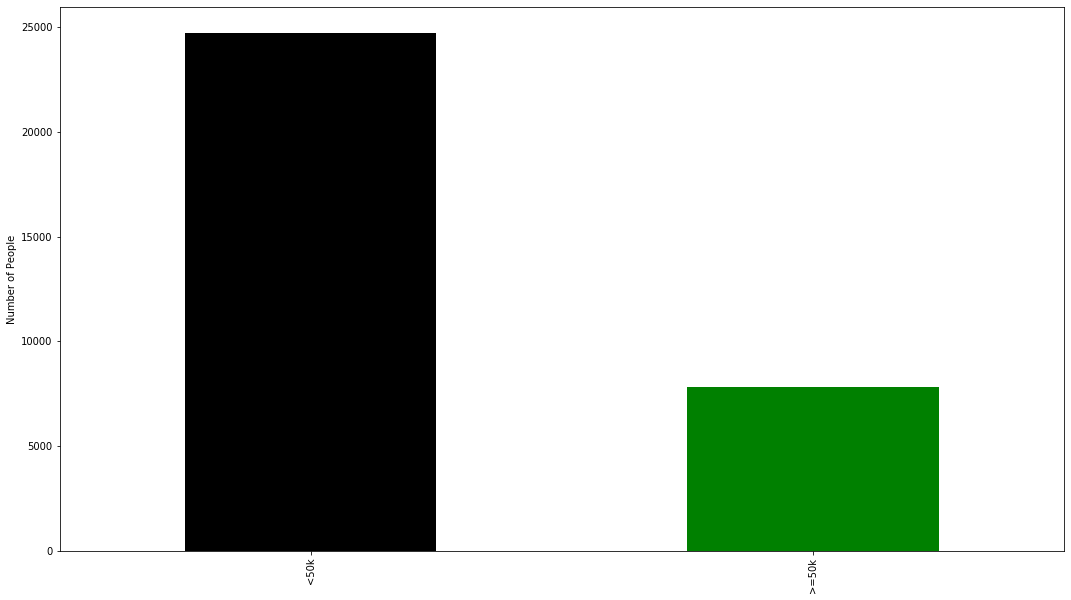

In [10]:
plot = plt.figure(figsize = (18,10))

ax = df.income.value_counts().plot(kind='bar', color = ['k', 'g'])
ax.set_xticklabels(['<50k', '>=50k'])
ax.set(ylabel = 'Number of People')
plt.show

In [11]:
temp = df[df["income"] == '>50K']
country_vs_age = df[["native.country","income","age"]].groupby(["native.country","income"]).mean()

In [12]:
country_vs_age = country_vs_age.reset_index()

<b> Plot 2</b>

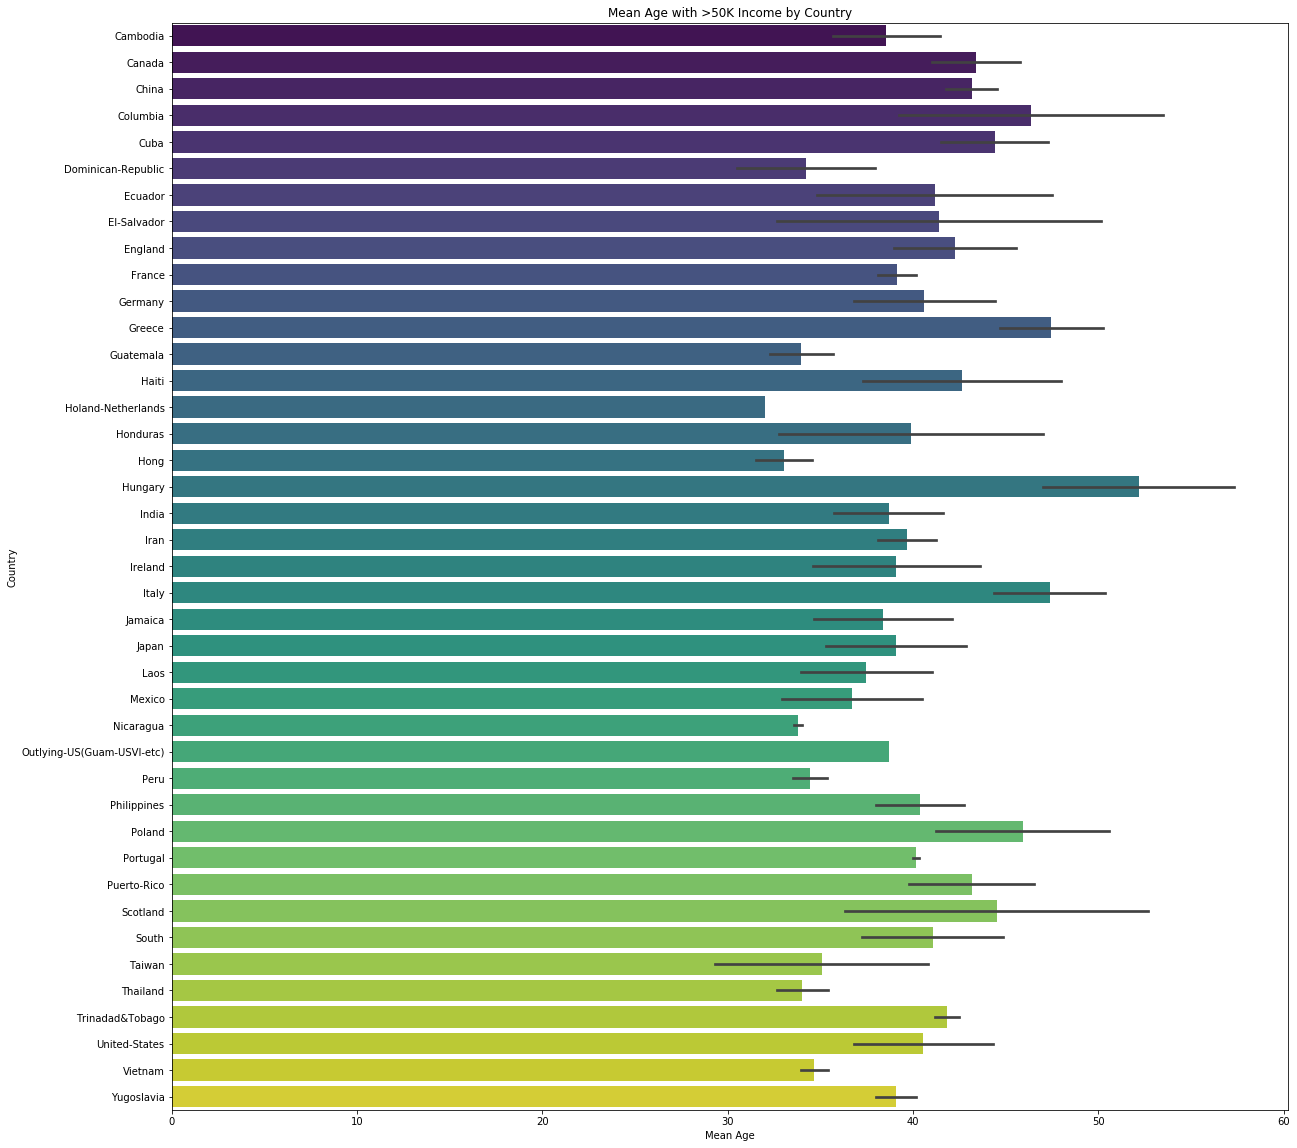

In [13]:
plt.figure(figsize = (20,20))
sns.barplot(x = "age", y = "native.country", data = country_vs_age, palette = "viridis")
plt.xlabel("Mean Age")
plt.ylabel("Country")
plt.title("Mean Age with >50K Income by Country")
plt.show()

In [14]:
education_data = temp.groupby("education")["income"].count()
education_data = education_data.reset_index()

<b> Plot 3</b>

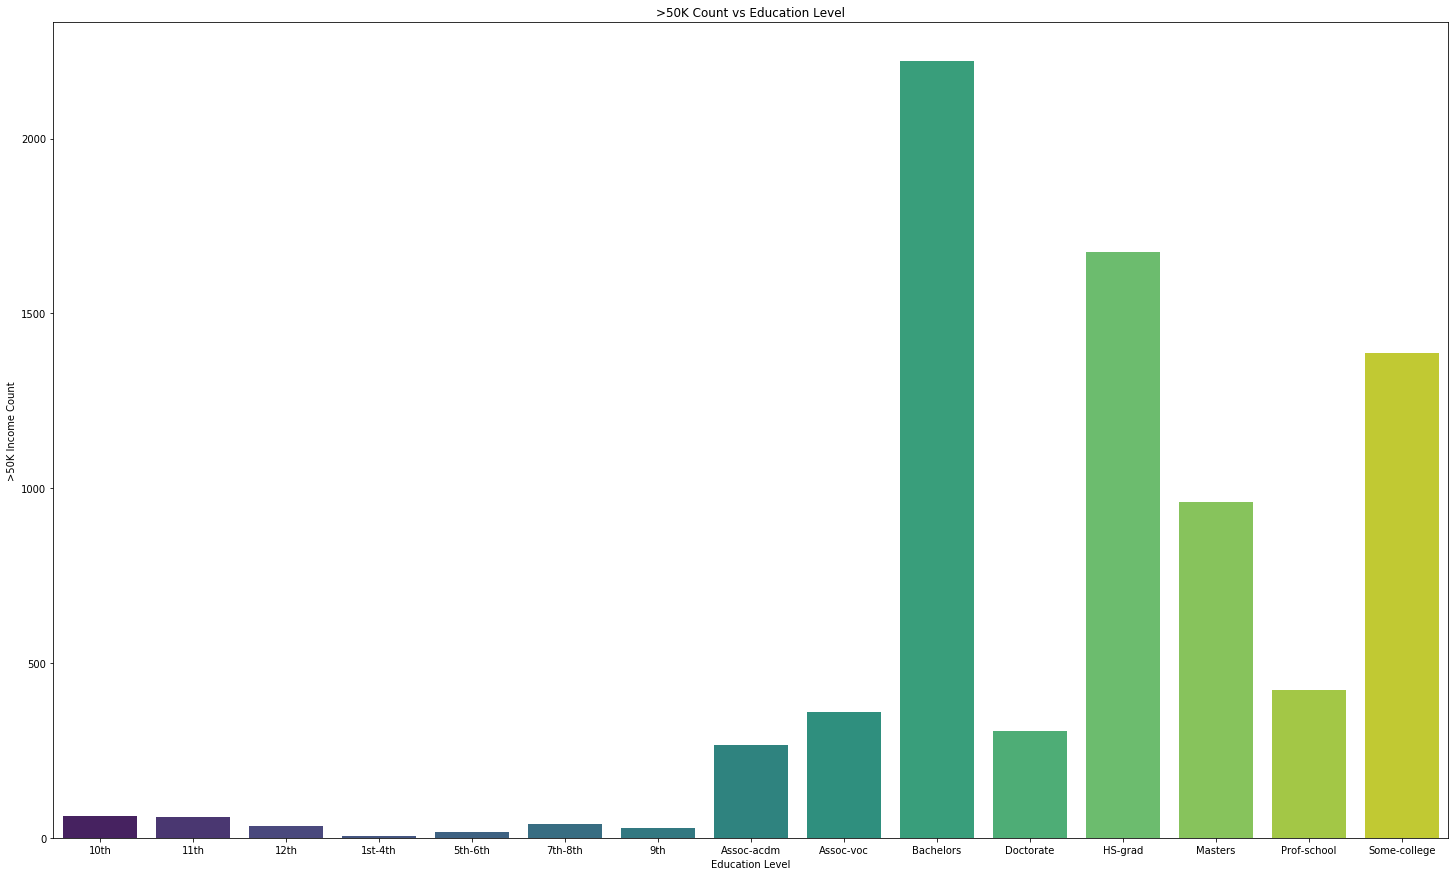

In [15]:
plt.figure(figsize = (25,15))
sns.barplot(x = "education", y ="income", data = education_data, palette = "viridis")
plt.xlabel("Education Level")
plt.ylabel(">50K Income Count")
plt.title(">50K Count vs Education Level")
plt.show()

<b>One-Hot Encoding the categorical variables</b>

In [16]:
def one_hot_encoding(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df


In [17]:
columns_to_label = ['workclass', 'marital.status', 'occupation', 'relationship', 'native.country']
df = one_hot_encoding(df, columns_to_label)
df.columns

Index(['age', 'education', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'Federal-gov', 'Local-gov', 'Never-worked',
       'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov',
       'Without-pay', 'Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed',
       'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv',
       'Sales', 'Tech-support', 'Transport-moving', 'Husband', 'Not-in-family',
       'Other-relative', 'Own-child', 'Unmarried', 'Wife', 'Cambodia',
       'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador',
       'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala',
       'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India',
       'Iran', 'Irela

In [18]:
df.drop('education',axis=1,inplace=True)
df1 = df

In [19]:
df['income'] = pd.factorize(data['income'])[0]
y = df['income']
x = df.drop('income',axis=1)
x.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,90,9,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,9,0,4356,18,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,66,10,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,4,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,41,10,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [21]:
#x['fnlwgt'] = x['fnlwgt'].replace(np.NAN,x['fnlwgt'].mean())
y.head()


0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [30]:
model = Sequential()
model.add(Dense(128, input_shape=(81,),activation='softmax'))
model.add(Dense(256,activation='softmax'))
model.add(Dense(1,activation='sigmoid'))

In [31]:
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=tf.keras.metrics.BinaryAccuracy(name='acc'))

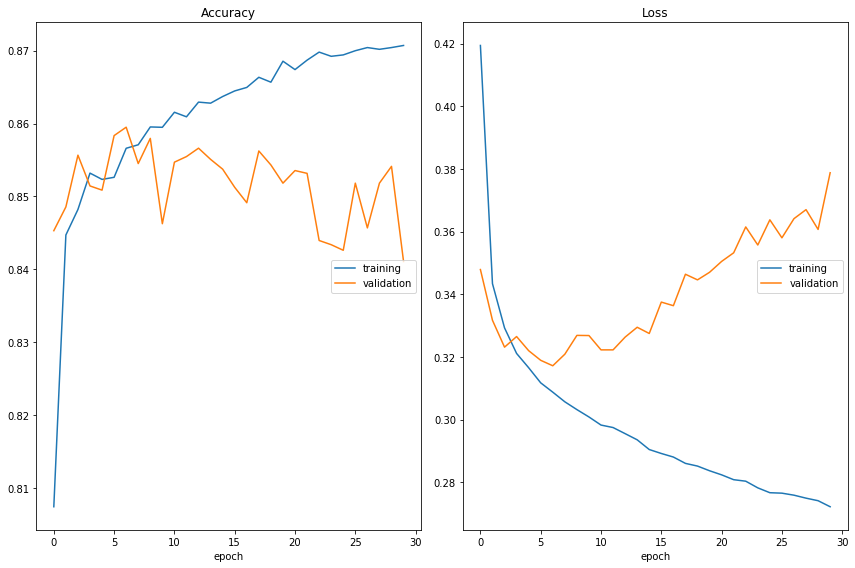

Accuracy
	training         	 (min:    0.807, max:    0.871, cur:    0.871)
	validation       	 (min:    0.841, max:    0.860, cur:    0.841)
Loss
	training         	 (min:    0.272, max:    0.419, cur:    0.272)
	validation       	 (min:    0.317, max:    0.379, cur:    0.379)
745/745 - 1s - loss: 0.2722 - acc: 0.8707 - val_loss: 0.3788 - val_acc: 0.8411 - 979ms/epoch - 1ms/step


In [32]:
model.fit(x_train, y_train, batch_size=28, epochs=30, validation_split=0.2, callbacks=[PlotLossesKeras(),es], verbose=2)

In [33]:
print("The shape of X_train is:",  x_train.shape)
print("The shape of Y_train is:",  y_train.shape)    
print("The shape of X_test is:",  x_test.shape)
print("The shape of Y_test is:",  y_test.shape)    

The shape of X_train is: (26048, 81)
The shape of Y_train is: (26048,)
The shape of X_test is: (6513, 81)
The shape of Y_test is: (6513,)


In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               10496     
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 43,777
Trainable params: 43,777
Non-trainable params: 0
_________________________________________________________________


# Part 2 

<b>SETUP 1: Changing the activaiton functions </b>

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [42]:
model1 = Sequential()
model1.add(Dense(128, input_shape=(81,),activation='relu')) # changing the activation functions
model1.add(Dense(256,activation='relu')) # chaning the activation functions 
model1.add(Dense(1,activation='sigmoid'))

In [43]:
optimizer = Adam(learning_rate=0.01)
model1.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=tf.keras.metrics.BinaryAccuracy(name='acc'))

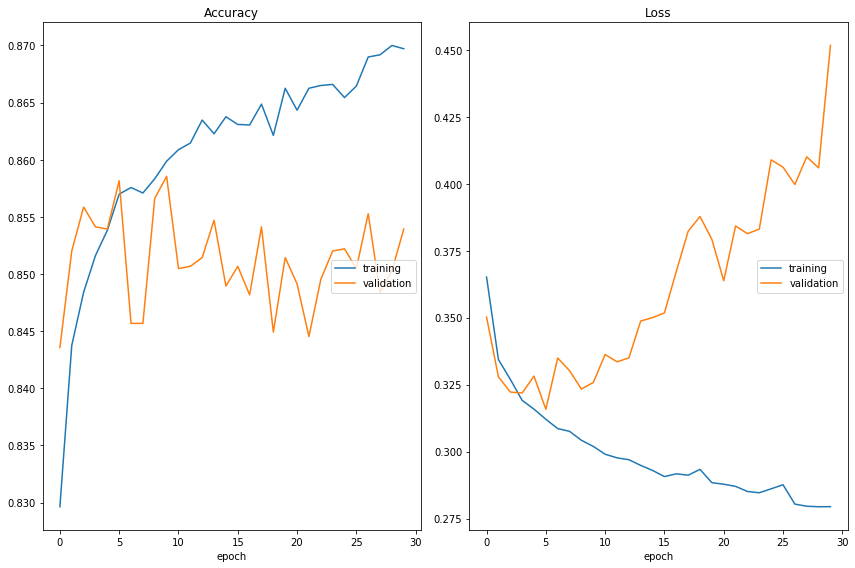

Accuracy
	training         	 (min:    0.830, max:    0.870, cur:    0.870)
	validation       	 (min:    0.844, max:    0.859, cur:    0.854)
Loss
	training         	 (min:    0.279, max:    0.365, cur:    0.279)
	validation       	 (min:    0.316, max:    0.452, cur:    0.452)
745/745 - 1s - loss: 0.2794 - acc: 0.8697 - val_loss: 0.4516 - val_acc: 0.8539 - 883ms/epoch - 1ms/step


In [44]:
model1.fit(x_train, y_train, batch_size=28, epochs=30, validation_split=0.2, callbacks=[PlotLossesKeras()], verbose=2)

<b> SETUP 2: Introdcution of Regularization </b>

In [50]:
from keras.layers import Dropout

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [52]:
model2 = Sequential()
model2.add(Dropout(0.2, input_shape = (81,)))
model2.add(Dense(128,activation='relu')) 
model2.add(Dense(256,activation='relu')) 
model2.add(Dense(1,activation='sigmoid'))

In [53]:
optimizer = Adam(learning_rate=0.01)
model2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=tf.keras.metrics.BinaryAccuracy(name='acc'))

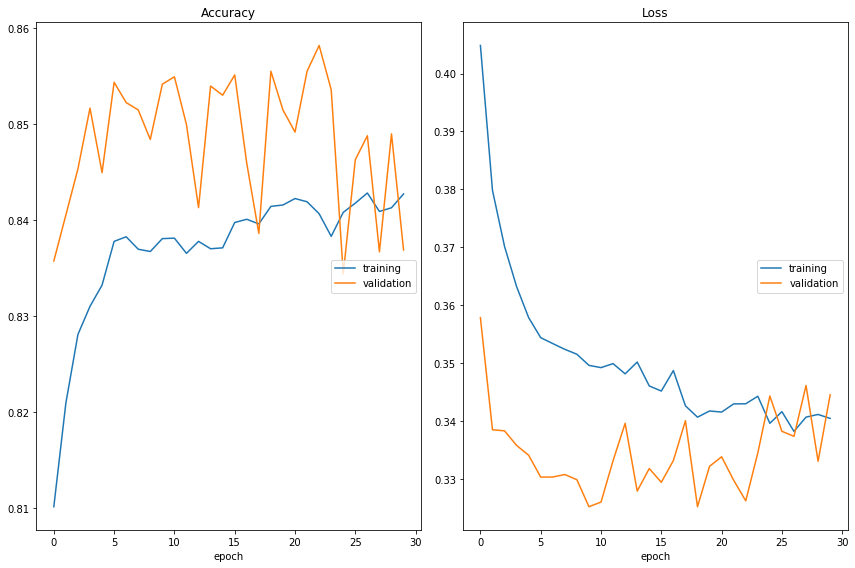

Accuracy
	training         	 (min:    0.810, max:    0.843, cur:    0.843)
	validation       	 (min:    0.834, max:    0.858, cur:    0.837)
Loss
	training         	 (min:    0.338, max:    0.405, cur:    0.340)
	validation       	 (min:    0.325, max:    0.358, cur:    0.345)
745/745 - 1s - loss: 0.3404 - acc: 0.8427 - val_loss: 0.3445 - val_acc: 0.8369 - 910ms/epoch - 1ms/step


In [54]:
model2.fit(x_train, y_train, batch_size=28, epochs=30, validation_split=0.2, callbacks=[PlotLossesKeras()], verbose=2)

<b> SETUP 3: Changing the optimizer </b>
NOTE: This Includes Regularization (L2) Method[2]

In [57]:
from tensorflow.keras.optimizers import SGD
from keras.regularizers import l2

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [59]:
model3 = Sequential()
model3.add(Dense(128, input_shape=(81,),activation='relu')) 
model3.add(Dense(256, kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01)))
model3.add(Dense(256,activation='relu'))  
model3.add(Dense(1,activation='sigmoid'))

In [60]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model3.compile(optimizer='sgd',loss='binary_crossentropy',metrics=tf.keras.metrics.BinaryAccuracy(name='acc'))

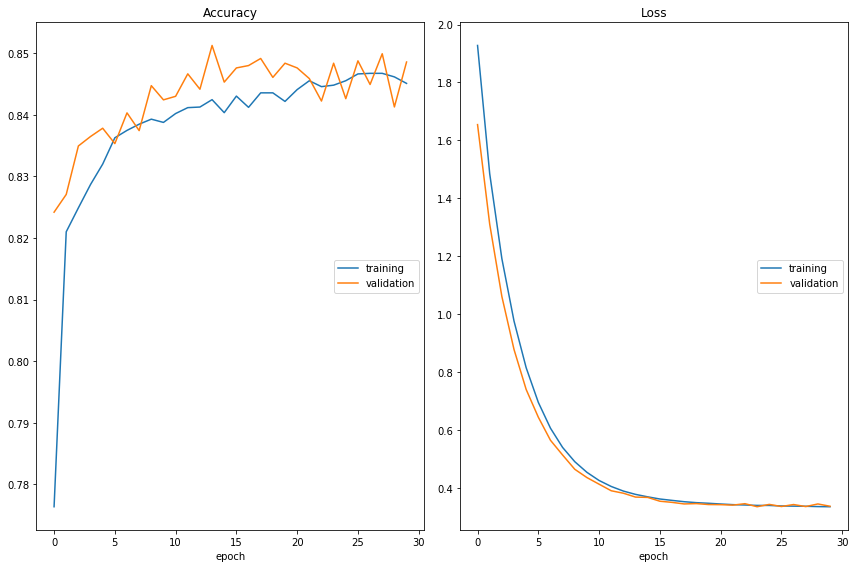

Accuracy
	training         	 (min:    0.776, max:    0.847, cur:    0.845)
	validation       	 (min:    0.824, max:    0.851, cur:    0.849)
Loss
	training         	 (min:    0.335, max:    1.928, cur:    0.335)
	validation       	 (min:    0.335, max:    1.655, cur:    0.336)
745/745 - 1s - loss: 0.3348 - acc: 0.8451 - val_loss: 0.3365 - val_acc: 0.8486 - 970ms/epoch - 1ms/step


In [61]:
model3.fit(x_train, y_train, batch_size=28, epochs=30, validation_split=0.2, callbacks=[PlotLossesKeras()], verbose=2)

# Early Stopping Method [3]

<b>EarlyStopping On Setup 1</b>

In [76]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience=15)

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [78]:
model1 = Sequential()
model1.add(Dense(128, input_shape=(81,),activation='relu')) # changing the activation functions
model1.add(Dense(256,activation='relu')) # chaning the activation functions 
model1.add(Dense(1,activation='sigmoid'))

In [79]:
optimizer = Adam(learning_rate=0.01)
model1.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=tf.keras.metrics.BinaryAccuracy(name='acc'))

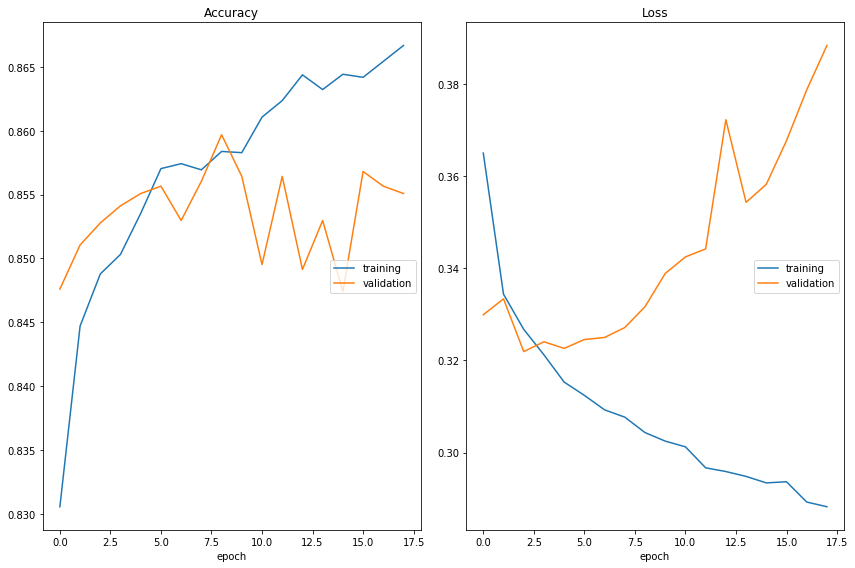

Accuracy
	training         	 (min:    0.831, max:    0.867, cur:    0.867)
	validation       	 (min:    0.847, max:    0.860, cur:    0.855)
Loss
	training         	 (min:    0.288, max:    0.365, cur:    0.288)
	validation       	 (min:    0.322, max:    0.388, cur:    0.388)
745/745 - 1s - loss: 0.2882 - acc: 0.8667 - val_loss: 0.3883 - val_acc: 0.8551 - 973ms/epoch - 1ms/step
Epoch 00018: early stopping


In [80]:
model1.fit(x_train, y_train, batch_size=28, epochs=100, validation_split=0.2, callbacks=[PlotLossesKeras(), es], verbose=2)

<b>EarlyStopping On Setup 2</b>

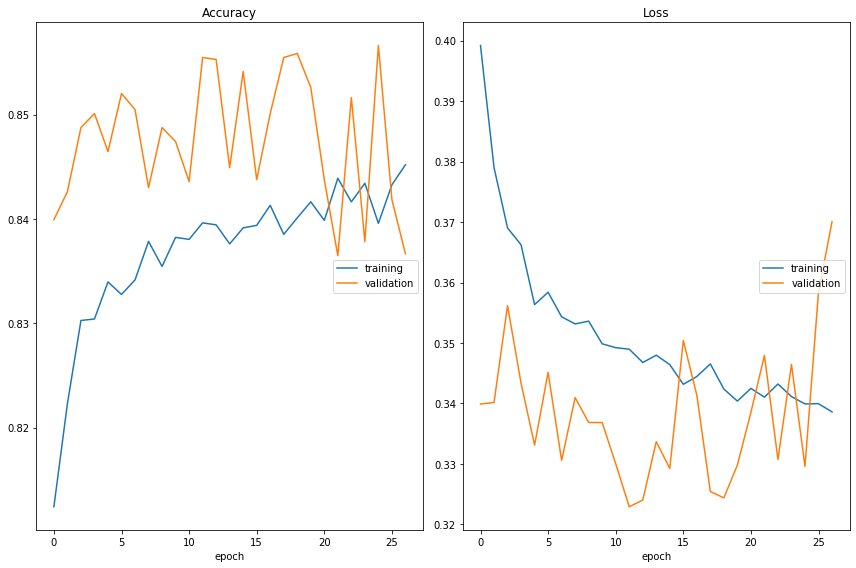

Accuracy
	training         	 (min:    0.812, max:    0.845, cur:    0.845)
	validation       	 (min:    0.836, max:    0.857, cur:    0.837)
Loss
	training         	 (min:    0.339, max:    0.399, cur:    0.339)
	validation       	 (min:    0.323, max:    0.370, cur:    0.370)
745/745 - 1s - loss: 0.3386 - acc: 0.8452 - val_loss: 0.3701 - val_acc: 0.8367 - 969ms/epoch - 1ms/step
Epoch 00027: early stopping


In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)
model2 = Sequential()
model2.add(Dropout(0.2, input_shape = (81,)))
model2.add(Dense(128,activation='relu')) 
model2.add(Dense(256,activation='relu')) 
model2.add(Dense(1,activation='sigmoid'))

optimizer = Adam(learning_rate=0.01)
model2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=tf.keras.metrics.BinaryAccuracy(name='acc'))
model2.fit(x_train, y_train, batch_size=28, epochs=100, validation_split=0.2, callbacks=[PlotLossesKeras(), es], verbose=2)

<b>EarlyStopping On Setup 3</b>

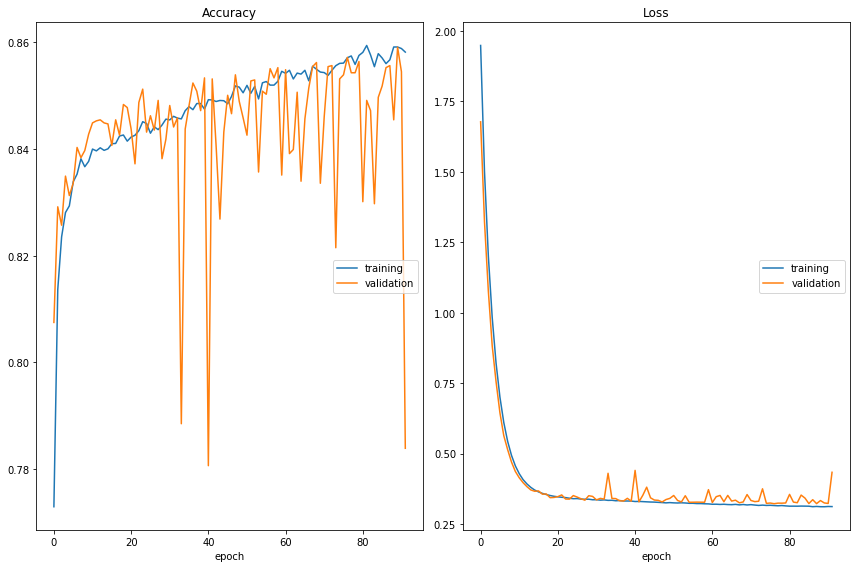

Accuracy
	training         	 (min:    0.773, max:    0.859, cur:    0.858)
	validation       	 (min:    0.781, max:    0.859, cur:    0.784)
Loss
	training         	 (min:    0.311, max:    1.949, cur:    0.312)
	validation       	 (min:    0.322, max:    1.678, cur:    0.433)
745/745 - 1s - loss: 0.3115 - acc: 0.8582 - val_loss: 0.4333 - val_acc: 0.7839 - 966ms/epoch - 1ms/step
Epoch 00092: early stopping


In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)
model3 = Sequential()
model3.add(Dense(128, input_shape=(81,),activation='relu')) 
model3.add(Dense(256, kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01)))
model3.add(Dense(256,activation='relu'))  
model3.add(Dense(1,activation='sigmoid'))
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model3.compile(optimizer='sgd',loss='binary_crossentropy',metrics=tf.keras.metrics.BinaryAccuracy(name='acc'))
model3.fit(x_train, y_train, batch_size=28, epochs=100, validation_split=0.2, callbacks=[PlotLossesKeras(),es], verbose=2)

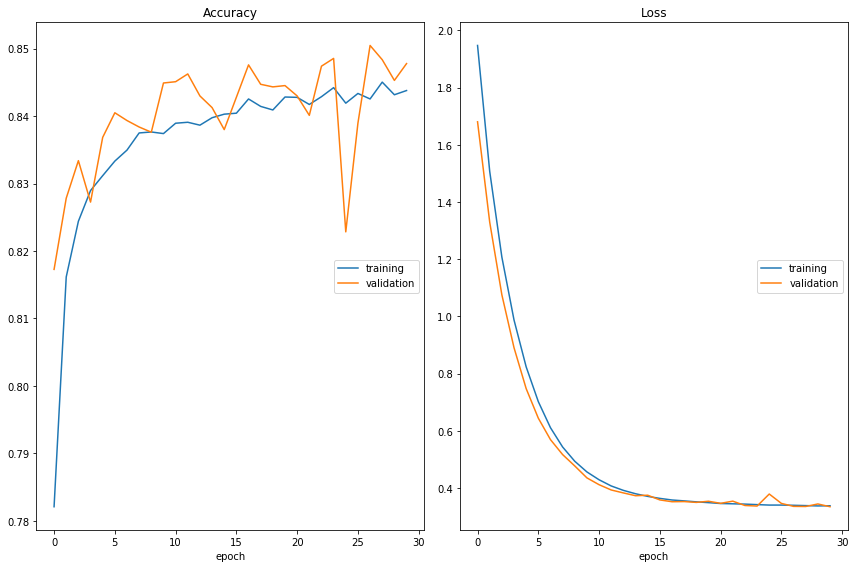

Accuracy
	training         	 (min:    0.782, max:    0.845, cur:    0.844)
	validation       	 (min:    0.817, max:    0.850, cur:    0.848)
Loss
	training         	 (min:    0.337, max:    1.947, cur:    0.338)
	validation       	 (min:    0.334, max:    1.680, cur:    0.334)
745/745 - 1s - loss: 0.3376 - acc: 0.8438 - val_loss: 0.3341 - val_acc: 0.8478 - 988ms/epoch - 1ms/step


In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)
model3 = Sequential()
model3.add(Dense(128, input_shape=(81,),activation='relu')) 
model3.add(Dense(256, kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01)))
model3.add(Dense(256,activation='relu'))  
model3.add(Dense(1,activation='sigmoid'))
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model3.compile(optimizer='sgd',loss='binary_crossentropy',metrics=tf.keras.metrics.BinaryAccuracy(name='acc'))
model3.fit(x_train, y_train, batch_size=28, epochs=30, validation_split=0.2, callbacks=[PlotLossesKeras(),es], verbose=2)

# Learning Rate Decay [4th Method]

In [100]:
from keras.callbacks import LearningRateScheduler
import math

In [104]:
def decay(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr*tf.math.exp(-0.1)
    

In [105]:
learn_rate = LearningRateScheduler(decay)

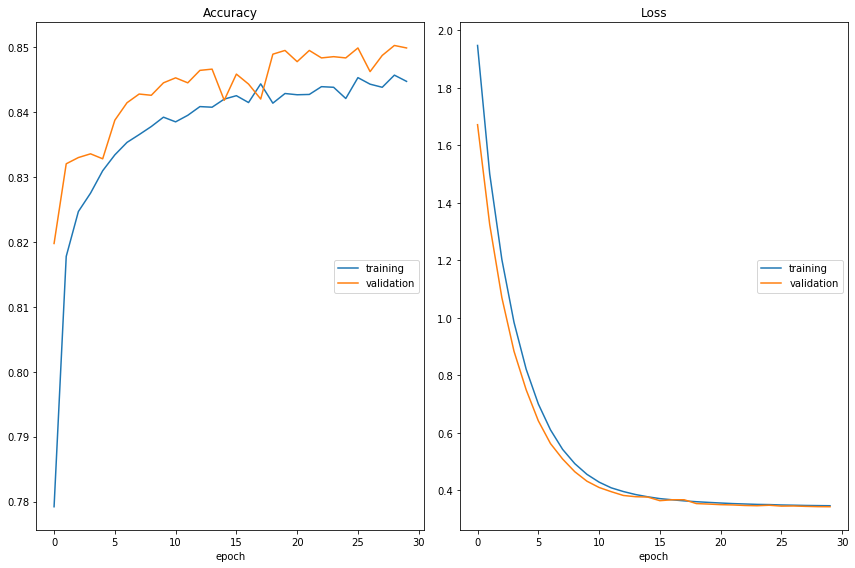

Accuracy
	training         	 (min:    0.779, max:    0.846, cur:    0.845)
	validation       	 (min:    0.820, max:    0.850, cur:    0.850)
Loss
	training         	 (min:    0.347, max:    1.947, cur:    0.347)
	validation       	 (min:    0.343, max:    1.672, cur:    0.343)
745/745 - 1s - loss: 0.3465 - acc: 0.8448 - val_loss: 0.3431 - val_acc: 0.8499 - lr: 0.0014 - 981ms/epoch - 1ms/step


In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)
modeld = Sequential()
modeld.add(Dense(128, input_shape=(81,),activation='relu')) 
modeld.add(Dense(256, kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01)))
modeld.add(Dense(256,activation='relu'))  
modeld.add(Dense(1,activation='sigmoid'))
epochs = 30
optimizer = SGD(learning_rate=0.01, momentum=0.9)
modeld.compile(optimizer='sgd',loss='binary_crossentropy',metrics=tf.keras.metrics.BinaryAccuracy(name='acc'))
modeld.fit(x_train, y_train, batch_size=28, epochs=epochs, validation_split=0.2, callbacks=[PlotLossesKeras(),learn_rate], verbose=2)

# Batch Normalization Method[4]

In [108]:
from tensorflow.keras.layers import BatchNormalization

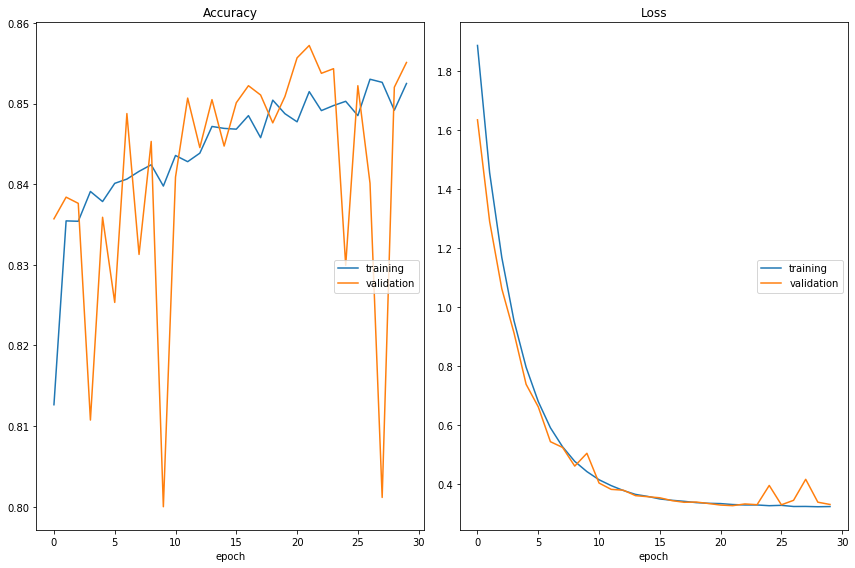

Accuracy
	training         	 (min:    0.813, max:    0.853, cur:    0.852)
	validation       	 (min:    0.800, max:    0.857, cur:    0.855)
Loss
	training         	 (min:    0.325, max:    1.887, cur:    0.325)
	validation       	 (min:    0.328, max:    1.635, cur:    0.332)
745/745 - 1s - loss: 0.3251 - acc: 0.8525 - val_loss: 0.3322 - val_acc: 0.8551 - 1s/epoch - 1ms/step


In [109]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)
modelbn = Sequential()
modelbn.add(Dense(128, input_shape=(81,),activation='relu')) 
modelbn.add(Dense(256, kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01)))
modelbn.add(Dense(256,activation='relu'))  
modelbn.add(BatchNormalization())
modelbn.add(Dense(1,activation='sigmoid'))
optimizer = SGD(learning_rate=0.01, momentum=0.9)
modelbn.compile(optimizer='sgd',loss='binary_crossentropy',metrics=tf.keras.metrics.BinaryAccuracy(name='acc'))
modelbn.fit(x_train, y_train, batch_size=28, epochs=30, validation_split=0.2, callbacks=[PlotLossesKeras()], verbose=2)